In [1]:
import numpy as np
import pandas as pd
import os


import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/basto/Learning/MachineLearning/Titanic/datas"
train = pd.read_csv(os.path.join(path, "train.csv"))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# def bar_chart(feature):
#     survived = train[train['Survived']==1][feature].value_counts()
#     dead = train[train['Survived']==0][feature].value_counts()
#     df = pd.DataFrame([survived,dead])
#     df.index = ['Survived','Dead']
#     df.plot(kind='bar', stacked = True, figsize = (10,5))
    

In [5]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked = True, figsize = (10,5))
    

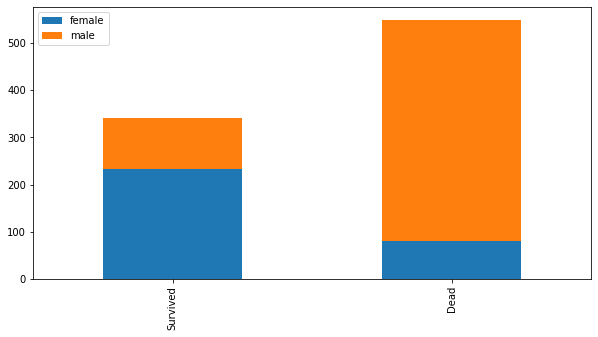

In [6]:
bar_chart('Sex')

We can see a lot of female survied and a lot of males are dead


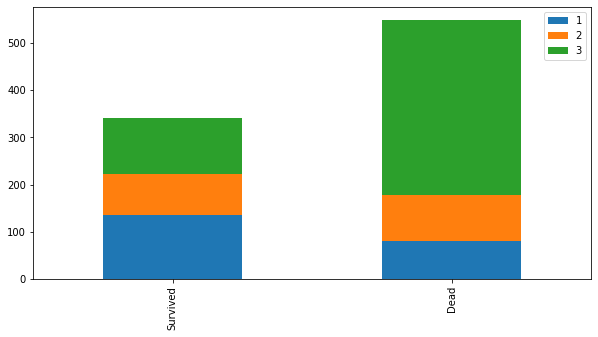

In [7]:
bar_chart('Pclass')

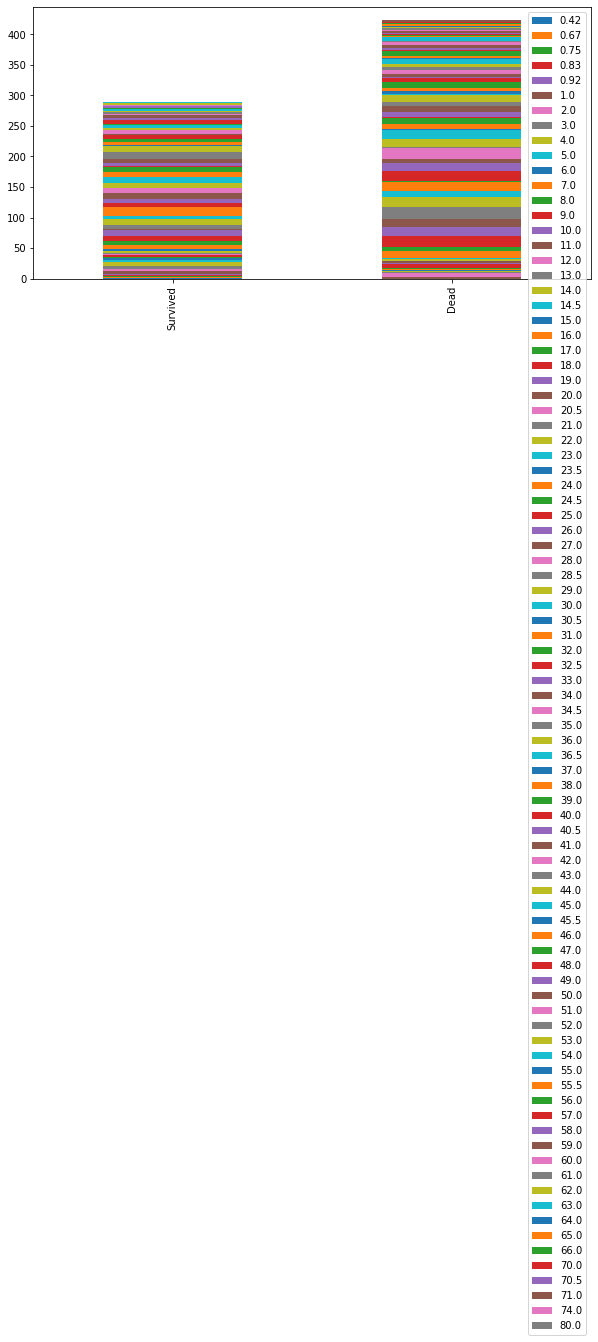

In [8]:
bar_chart('Age')

## Grouping ages into 3 - Child,Teens, Adults, Elderly

- Child :   0 - 10
- Teens :  10- 17
- Adults : 18+
- Elderly : 65 +


In [9]:
r = [0,10,17,65, 110]
g = ['Child','Teen','Adult','Elderly']
train['AgeCtg'] = pd.cut(train['Age'], bins = r, labels = g)

In [10]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCtg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teen


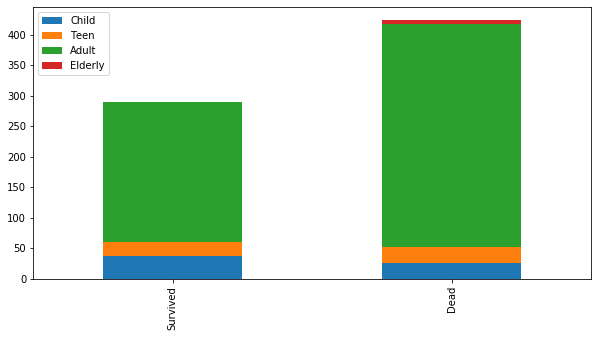

In [11]:
bar_chart('AgeCtg')

## Most of the age is Nan so filling up the ages

#### Based on survived we gonna fill random ages: between 0-100

* if it's female and survived :  0-40
* if it's male and survived: Age 0-18 (Child or Teen) (Somecase may be Higher class)
* if it is female but didn't survived (Probably elderly) - 40-100
* if it's male and didn't survived : (Adult or elderly or Lower class)



In [12]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCtg
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,True
889,False,False,False,False,False,False,False,False,False,False,False,False,False


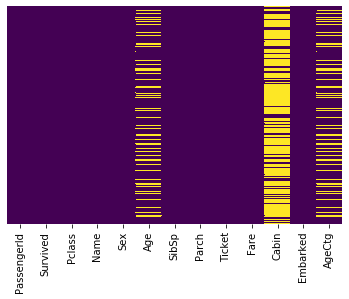

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap= 'viridis')

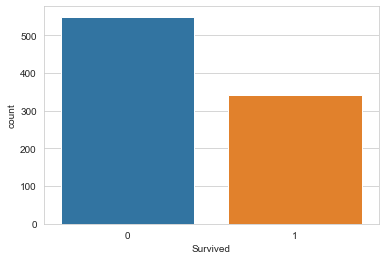

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

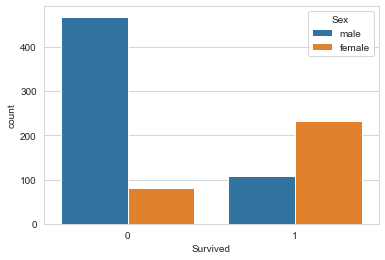

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Sex', data = train)

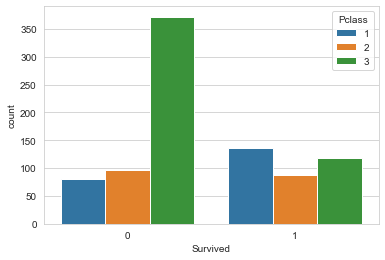

In [16]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Pclass', data = train)

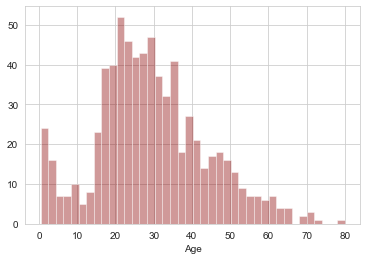

In [17]:
sns.distplot(train['Age'].dropna(), kde= False, color = 'darkred', bins = 40)

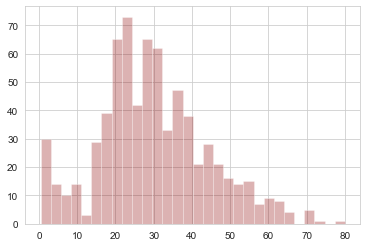

In [18]:
train['Age'].hist(bins=30, color = 'darkred', alpha = 0.3)


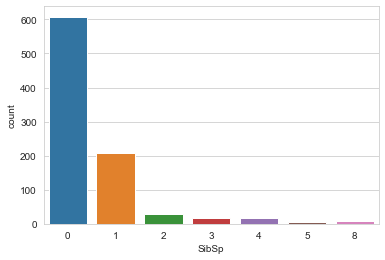

In [19]:
sns.countplot(x = 'SibSp', data = train)

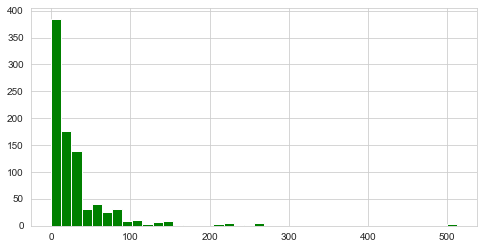

In [20]:
train['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

In [21]:
import cufflinks as cf
cf.go_offline()

In [22]:
train['Fare'].iplot(kind='hist', bins = 30, color = 'white')

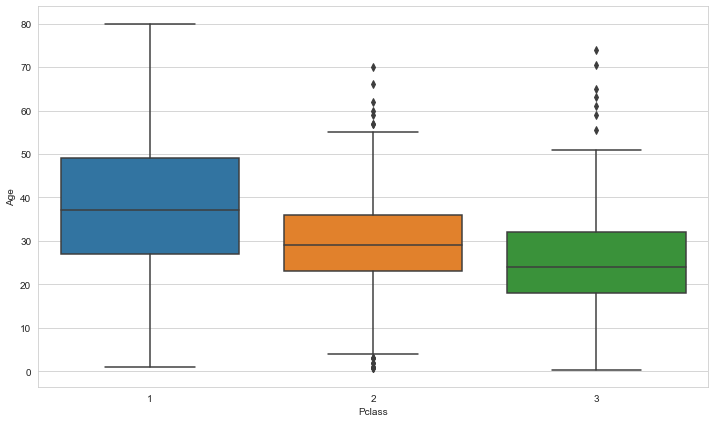

In [23]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [25]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

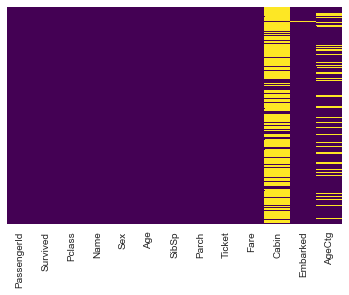

In [26]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [27]:
train.drop('Cabin', axis = 1, inplace = True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCtg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [29]:
train.dropna(inplace =True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCtg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Survived     712 non-null    int64   
 2   Pclass       712 non-null    int64   
 3   Name         712 non-null    object  
 4   Sex          712 non-null    object  
 5   Age          712 non-null    float64 
 6   SibSp        712 non-null    int64   
 7   Parch        712 non-null    int64   
 8   Ticket       712 non-null    object  
 9   Fare         712 non-null    float64 
 10  Embarked     712 non-null    object  
 11  AgeCtg       712 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 67.6+ KB


In [32]:
sex = pd.get_dummies(train['Sex'], drop_first = False)
embark = pd.get_dummies(train['Embarked'], drop_first = False)

In [33]:
train.drop(['Sex','Embarked','Name', 'Ticket'], axis = 1, inplace= True)


In [34]:
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeCtg
0,1,0,3,22.0,1,0,7.2500,Adult
1,2,1,1,38.0,1,0,71.2833,Adult
2,3,1,3,26.0,0,0,7.9250,Adult
3,4,1,1,35.0,1,0,53.1000,Adult
4,5,0,3,35.0,0,0,8.0500,Adult


In [36]:
train = pd.concat([train, sex, embark], axis =1 )

In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeCtg,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,Adult,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,Adult,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,Adult,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,Adult,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,Adult,0,1,0,0,1


In [38]:
train = train.drop('AgeCtg', axis = 1)

## Building a Logistic Regression model

Let's start by splitting our data inot a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [40]:
# axis 1 is column it drops all the column

train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [41]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test , y_train, y_test = train_test_split(train.drop('Survived', axis = 1),
                                                    train['Survived'], test_size = 0.30,
                                                    random_state = 101)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression


In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
predictions

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
accuracy = confusion_matrix(y_test, predictions)


In [50]:
accuracy

array([[110,  18],
       [ 25,  61]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7990654205607477

# Stochastic Gradient Descent

In [53]:
from sklearn.linear_model import SGDClassifier


In [54]:
clf = SGDClassifier(loss = 'hinge', penalty = 'l2', max_iter = 5)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
sgdpredict = clf.predict(X_test)

In [56]:
sgdaccuracy = confusion_matrix(y_test, sgdpredict)


In [57]:
sgdaccuracy = accuracy_score(y_test, sgdpredict)
sgdaccuracy

0.5934579439252337

In [58]:
from sklearn.kernel_approximation import RBFSampler


In [59]:
rbf_feature = RBFSampler(gamma = 1, random_state = 1)
X_features = rbf_feature.fit_transform(X_train)

clf = SGDClassifier(max_iter = 5)
clf.fit(X_features, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
clf.score(X_features, y_train)

0.5562248995983936